<a href="https://colab.research.google.com/github/Anushriya3007/ML-Lab/blob/main/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of X: (360, 64)
Classes: {np.int64(0), np.int64(1)}


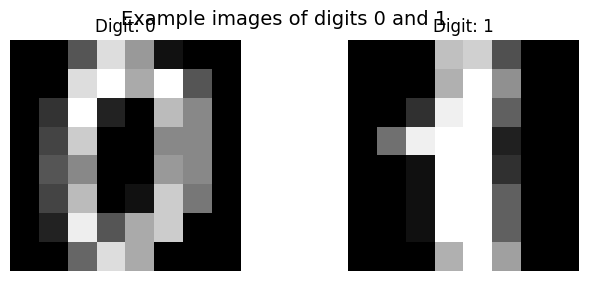

Accuracy: 1.0
Confusion Matrix:
 [[35  0]
 [ 0 37]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        37

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



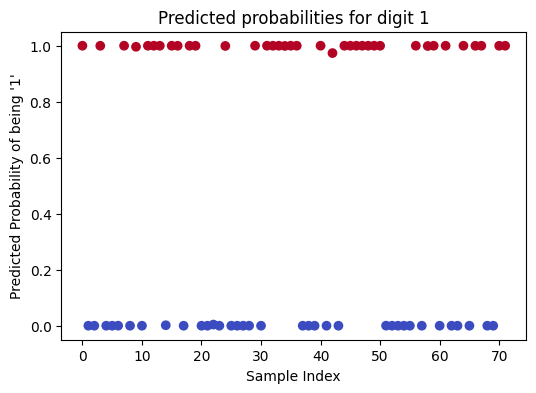

In [2]:
# Step 1: Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load the digits dataset
digits = load_digits()

# Filter only digits 0 and 1
mask = (digits.target == 0) | (digits.target == 1)
X = digits.data[mask]
y = digits.target[mask]

print("Shape of X:", X.shape)
print("Classes:", set(y))

# Step 3: Visualize examples of '0' and '1' horizontally
plt.figure(figsize=(8, 3))
for i, num in enumerate([0, 1]):
    plt.subplot(1, 2, i + 1)
    plt.imshow(digits.images[digits.target == num][0], cmap='gray')
    plt.title(f"Digit: {num}")
    plt.axis('off')
plt.suptitle("Example images of digits 0 and 1", fontsize=14)
plt.show()

# Step 4: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Predict
y_pred = model.predict(X_test)

# Step 7: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Visualize probability distribution
probs = model.predict_proba(X_test)[:, 1]
plt.figure(figsize=(6,4))
plt.scatter(range(len(probs)), probs, c=y_test, cmap='coolwarm')
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability of being '1'")
plt.title("Predicted probabilities for digit 1")
plt.show()


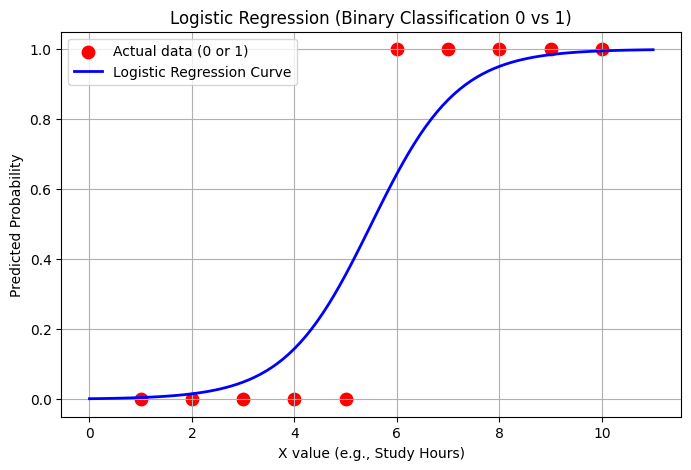

In [3]:
# Logistic Regression with binary output (0 and 1)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Step 1: Create binary data
# X = feature (like study hours), y = 0 or 1 (fail/pass)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Step 2: Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Step 3: Predict probabilities
X_test = np.linspace(0, 11, 100).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 4: Plot data and logistic curve
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='red', label='Actual data (0 or 1)', s=80)
plt.plot(X_test, y_prob, color='blue', linewidth=2, label='Logistic Regression Curve')

plt.title("Logistic Regression (Binary Classification 0 vs 1)")
plt.xlabel("X value (e.g., Study Hours)")
plt.ylabel("Predicted Probability")
plt.legend()
plt.grid(True)
plt.show()


Dataset loaded — only digits 0 and 1
Shape of X: (14780, 784)
Labels: [0 1]


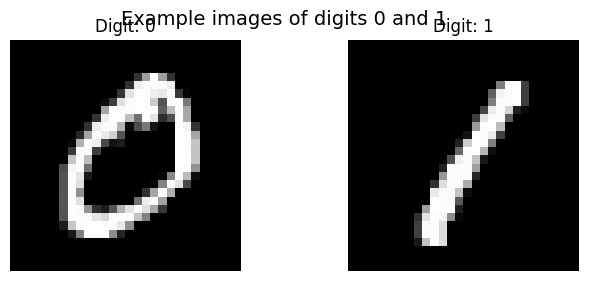

Training Logistic Regression model...

Model Accuracy: 0.9997
Confusion Matrix:
 [[1401    1]
 [   0 1554]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1402
           1       1.00      1.00      1.00      1554

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956



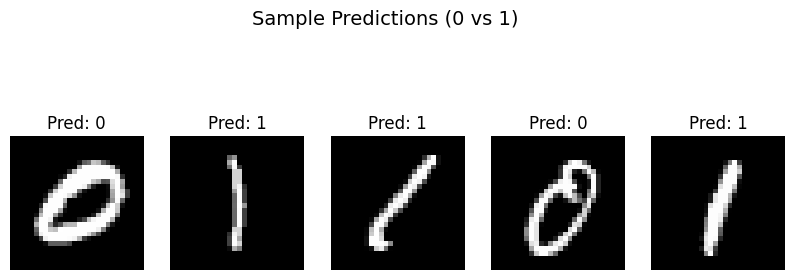

In [4]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Step 2: Load MNIST dataset
print("Downloading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Step 3: Select only digits '0' and '1'
X = mnist.data
y = mnist.target.astype(int)
mask = (y == 0) | (y == 1)
X, y = X[mask], y[mask]

print("Dataset loaded — only digits 0 and 1")
print("Shape of X:", X.shape)
print("Labels:", np.unique(y))

# Step 4: Visualize examples of digits 0 and 1
plt.figure(figsize=(8, 3))
for i, digit in enumerate([0, 1]):
    plt.subplot(1, 2, i + 1)
    plt.imshow(X[y == digit][0].reshape(28, 28), cmap='gray')
    plt.title(f"Digit: {digit}")
    plt.axis('off')
plt.suptitle("Example images of digits 0 and 1", fontsize=14)
plt.show()

# Step 5: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train logistic regression model
print("Training Logistic Regression model...")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate model
acc = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {acc:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Visualize some predictions
plt.figure(figsize=(10, 4))
for i, idx in enumerate(np.random.choice(len(X_test), 5, replace=False)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}")
    plt.axis('off')
plt.suptitle("Sample Predictions (0 vs 1)", fontsize=14)
plt.show()
